In [ ]:
! pip install vit_keras

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from PIL import Image
import zipfile
import json
import numpy as np
from transformers import RobertaTokenizer, TFRobertaModel
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input
from vit_keras import vit

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Define the path to the JSON file
json_file_path = '/content/drive/MyDrive/nytimes_train.json'

# Read the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)
# Print a summary of the first few article samples
num_samples_to_print = 5
for i, article in enumerate(data[:num_samples_to_print]):
    print(f"Article {i+1}: {article}")


len(data)
print(type(data))

Article 1: {'section': 'Theater', 'headline': "Before 'Moonlight' and 'The Walking Dead,' a Friendship Born in the Classroom", 'article_url': 'https://www.nytimes.com/2017/02/21/theater/danai-gurira-andre-holland-walking-dead.html', 'article': 'Danai Gurira and Andre Holland in a theater at New York University, where they met in the Tisch Graduate Acting Program.\n\nBehind every successful person are relationships that helped forge a path. But the stories of these friendships, collaborations, alliances, romances or rivalries often are lost in the glow of achievement. In this new feature, we explore a personal connection that made a difference in the lives of two artists. Andre Holland never thought much about writing his own monologues when he attended the Tisch graduate acting program at New York University. But one day, early in his first semester in 2003, he watched another African-American student, Danai Gurira, forgo the usual speeches by white characters and perform her own mater

drop out the news which does not contain any images.

In [ ]:
# Remove articles that do not contain an image
data_with_images = [article for article in data if 'image' in article]

# Print the number of articles with images
print("Number of articles with images:", len(data_with_images))




Number of articles with images: 48988


All articles contain images!, that is good

In [ ]:
data[1]

{'section': 'Television',
 'headline': "What's on TV Wednesday: 'Crip Camp' and 'Dark Phoenix'",
 'article_url': 'https://www.nytimes.com/2020/03/25/arts/television/whats-on-tv-wednesday-crip-camp-and-dark-phoenix.html',
 'article': 'CRIP CAMP: A DISABILITY REVOLUTION (2020) Stream on Netflix. This documentary, the latest offering from Barack Obama and Michelle Obama\'s production company, draws a direct line between a Catskills summer camp and the American disability rights movement of the 1970s. Directed by Jim LeBrecht and Nicole Newnham, the film begins by focusing on Camp Jened, which was founded in the early 1950s and served as a community for campers with disabilities. But it eventually shifts focus to look at the adult lives of some of the camp\'s alumni, several of whom became prominent activists. In his review for The New York Times, Ben Kenigsberg wrote that the film "unfolds from a perspective of lived experience." Newnham and LeBrecht, he added, "deftly juggle a large cast

In [ ]:

# Retrieve keys from the dictionary stored in data[1]
keys_data_1 = data[1].keys()

# Print the keys
print("Keys from data[1]:", keys_data_1)


Keys from data[1]: dict_keys(['section', 'headline', 'article_url', 'article', 'abstract', 'article_id', 'image', 'caption', 'image_id'])


In [ ]:
# Iterate through each dictionary in the data list
is_contain_vedios=[]
for i, article in enumerate(data):
    # Check if the current article contains the key 'video'
    if 'video' in article:
        # Print a message indicating that there is a video
        print(f"Article at index {i} contains a video.")
        is_contain_vedios.append(i)
    else:
        # Print a message indicating that there are no videos
        print(f"Article at index {i} does not contain any videos.")


Streaming output truncated to the last 5000 lines.
Article at index 43988 does not contain any videos.
Article at index 43989 does not contain any videos.
Article at index 43990 does not contain any videos.
Article at index 43991 does not contain any videos.
Article at index 43992 does not contain any videos.
Article at index 43993 does not contain any videos.
Article at index 43994 does not contain any videos.
Article at index 43995 does not contain any videos.
Article at index 43996 does not contain any videos.
Article at index 43997 does not contain any videos.
Article at index 43998 does not contain any videos.
Article at index 43999 does not contain any videos.
Article at index 44000 does not contain any videos.
Article at index 44001 does not contain any videos.
Article at index 44002 does not contain any videos.
Article at index 44003 does not contain any videos.
Article at index 44004 does not contain any videos.
Article at index 44005 does not contain any videos.
Article at in

In [ ]:
len(is_contain_vedios)

0

check how many uique section (category are there?

In [ ]:
# Create an empty set to store unique sections
unique_sections = list()

# Iterate through each dictionary in the data list
for article in data:
    # Extract the value corresponding to the 'section' key
    section = article.get('section')
    # Add the section value to the set of unique sections
    if section is not None:  # Check if section is not None
        unique_sections.append(section)

# Print the number of unique sections
print("Number of unique sections:", len(unique_sections))

# Print the unique sections
print("Unique sections:", unique_sections)


Number of unique sections: 48988
Unique sections: ['Theater', 'Television', 'Sports', 'Art & Design', 'Theater', 'Travel', 'Media', 'Education', 'Music', 'Art & Design', 'Music', 'Global Business', 'Sports', 'Opinion', 'Books', 'Movies', 'Food', 'Style', 'Travel', 'Dance', 'Technology', 'Dance', 'Dance', 'Movies', 'Technology', 'Science', 'Television', 'Fashion & Style', 'Food', 'Travel', 'Travel', 'Food', 'Movies', 'Travel', 'Theater', 'Food', 'Music', 'Dance', 'Well', 'Food', 'Theater', 'Theater', 'Theater', 'Opinion', 'Art & Design', 'Television', 'Real Estate', 'Books', 'Fashion & Style', 'Movies', 'Sports', 'Global Business', 'Movies', 'Television', 'Dance', 'Technology', 'Travel', 'Economy', 'Movies', 'Opinion', 'Television', 'Science', 'Media', 'Science', 'Television', 'Style', 'Music', 'Opinion', 'Technology', 'Travel', 'Well', 'Sports', 'Global Business', 'Real Estate', 'Health', 'Science', 'Media', 'Books', 'Food', 'Books', 'Television', 'Technology', 'Health', 'Education', '

There are 24 categories in this dataset

 collect samples for each unique section

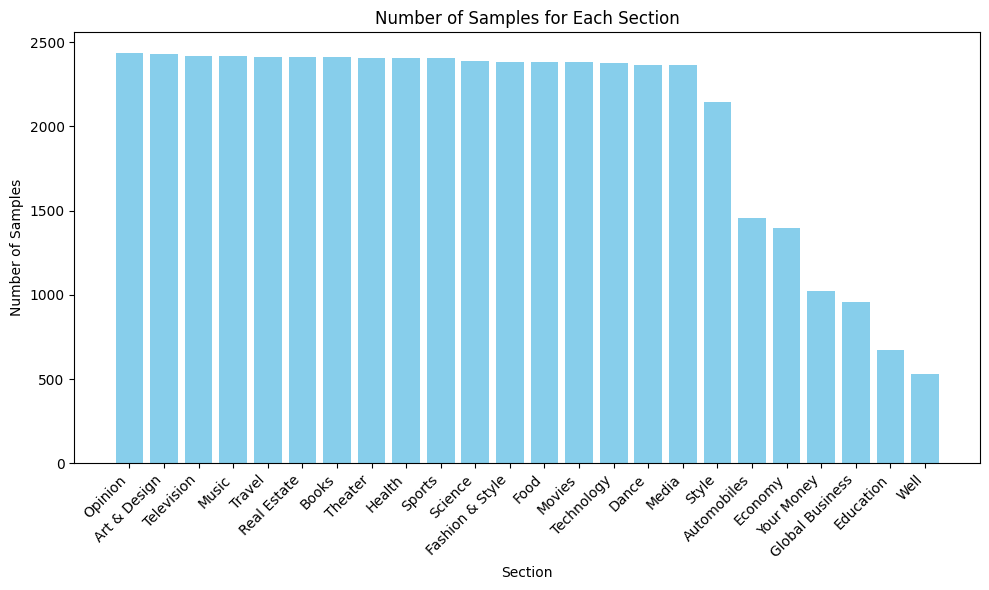

            section  number of samples
9           Opinion               2437
3      Art & Design               2431
1        Television               2419
7             Music               2416
4            Travel               2413
19      Real Estate               2413
10            Books               2412
0           Theater               2409
21           Health               2409
2            Sports               2407
16          Science               2387
17  Fashion & Style               2385
12             Food               2385
11           Movies               2384
15       Technology               2376
14            Dance               2365
5             Media               2363
13            Style               2147
23      Automobiles               1456
20          Economy               1398
22       Your Money               1020
8   Global Business                955
6         Education                672
18             Well                529


In [ ]:
# Extract unique section names and count samples for each section
section_counts = {}
for article in data:
    section = article['section']
    section_counts[section] = section_counts.get(section, 0) + 1

# Convert dictionary to DataFrame
df = pd.DataFrame({'section': list(section_counts.keys()), 'number of samples': list(section_counts.values())})

# Sort DataFrame by number of samples
df = df.sort_values(by='number of samples', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['section'], df['number of samples'], color='skyblue')

# Add labels and title
plt.xlabel('Section')
plt.ylabel('Number of Samples')
plt.title('Number of Samples for Each Section')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

# Display the DataFrame
print(df)

check lengths of Headline, Caption, Abstract and Body repectively for all data

In [ ]:

# Create lists to store lengths of each field
headline_lengths = []
caption_lengths = []
abstract_lengths = []
body_lengths = []

# Iterate through each dictionary in the data list
for article in data:
    # Extract lengths of Headline, Caption, Abstract, and Body and append to respective lists
    headline_lengths.append(len(article.get('headline', '')))
    caption_lengths.append(len(article.get('caption', '')))
    abstract_lengths.append(len(article.get('abstract', '')))
    body_lengths.append(len(article.get('article', '')))

# Create a DataFrame to store the results
lengths_df = pd.DataFrame({
    'Headline Length': headline_lengths,
    'Caption Length': caption_lengths,
    'Abstract Length': abstract_lengths,
    'Body Length': body_lengths
})

# Display the DataFrame
display(lengths_df)


,Headline Length,Caption Length,Abstract Length,Body Length
0,77,120,144,6566
1,54,65,103,2932
2,53,60,163,6408
3,47,52,147,7174
4,62,125,142,566
...,...,...,...,...
48983,42,86,55,272
48984,57,19,141,1070
48985,31,45,181,1011
48986,58,165,152,5058


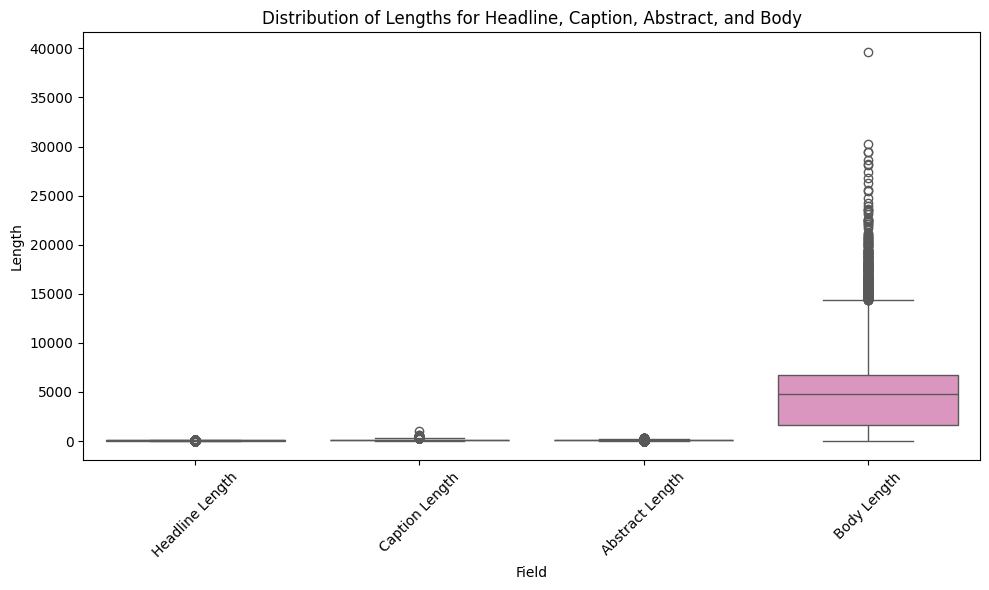

In [ ]:

# Create a DataFrame to store the results
lengths_df = pd.DataFrame({
    'Headline Length': headline_lengths,
    'Caption Length': caption_lengths,
    'Abstract Length': abstract_lengths,
    'Body Length': body_lengths
})

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=lengths_df, palette='Set2')

# Add labels and title
plt.xlabel('Field')
plt.ylabel('Length')
plt.title('Distribution of Lengths for Headline, Caption, Abstract, and Body')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


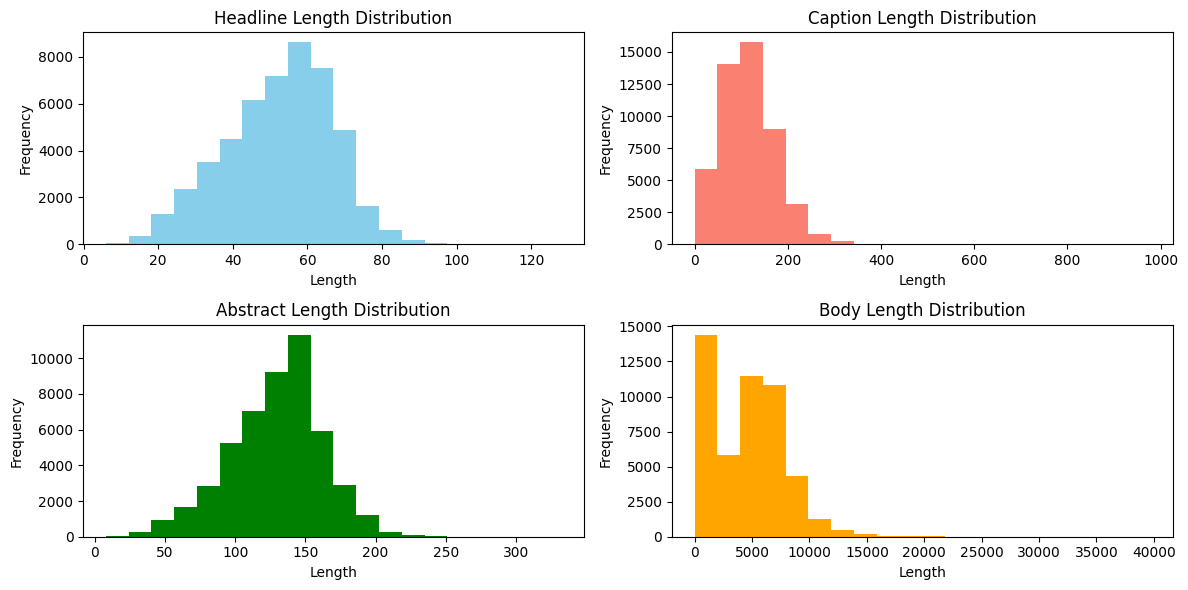

In [ ]:

# Create subplots for each field
plt.figure(figsize=(12, 6))

# Headline
plt.subplot(2, 2, 1)
plt.hist(headline_lengths, bins=20, color='skyblue')
plt.title('Headline Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Caption
plt.subplot(2, 2, 2)
plt.hist(caption_lengths, bins=20, color='salmon')
plt.title('Caption Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Abstract
plt.subplot(2, 2, 3)
plt.hist(abstract_lengths, bins=20, color='green')
plt.title('Abstract Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Body
plt.subplot(2, 2, 4)
plt.hist(body_lengths, bins=20, color='orange')
plt.title('Body Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Headline: the length distribution of headline in the train dataset ranges approximately from 10 to 250
Caption: the length distribution of caption ranges approximately from 0 to 350
Abstract:the length distribution of abstrat ranges approximately from10 to 250
Body: the length distribution of body  ranges approximately from 0 to 2000

This study will focus on what the news images in
N24News are able to provide to improve the classification results as Text feature in classification task has been well studied
before

there are some similar categories, for example, theater and movies. Only with text, it is difficult to tell the story is happening in a
theater or on a screen, but images make things much
easier. Theater-related images always happened on a
stage, but movies not, as shown in Figure 1. This makes
a huge difference, and if we can make good use of
image information, the classification accuracy will be
much higher

All samples are annotated with the necessary information, including category tag, headline, abstract, article body, image URL, and image caption.

displaying the image of one of the articles in training set

In [ ]:
data[1]

{'section': 'Television',
 'headline': "What's on TV Wednesday: 'Crip Camp' and 'Dark Phoenix'",
 'article_url': 'https://www.nytimes.com/2020/03/25/arts/television/whats-on-tv-wednesday-crip-camp-and-dark-phoenix.html',
 'article': 'CRIP CAMP: A DISABILITY REVOLUTION (2020) Stream on Netflix. This documentary, the latest offering from Barack Obama and Michelle Obama\'s production company, draws a direct line between a Catskills summer camp and the American disability rights movement of the 1970s. Directed by Jim LeBrecht and Nicole Newnham, the film begins by focusing on Camp Jened, which was founded in the early 1950s and served as a community for campers with disabilities. But it eventually shifts focus to look at the adult lives of some of the camp\'s alumni, several of whom became prominent activists. In his review for The New York Times, Ben Kenigsberg wrote that the film "unfolds from a perspective of lived experience." Newnham and LeBrecht, he added, "deftly juggle a large cast

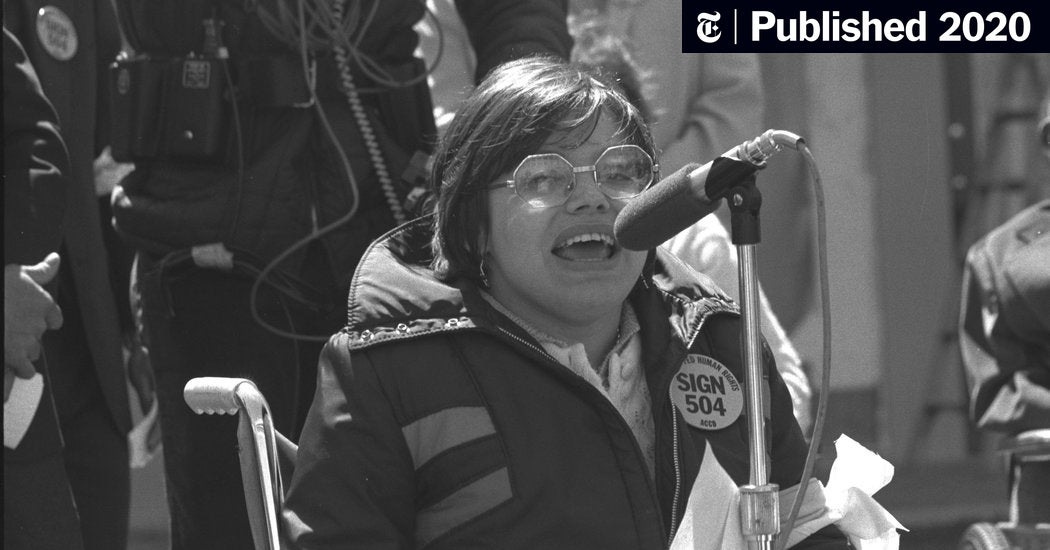

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os

# Image ID from the article data
image_id = data[1]['image_id']

# Directory containing the images
image_dir = '/content/drive/MyDrive/'  # Update this with the actual directory path

# Construct the file path to the image
image_file_path = os.path.join(image_dir, f'{image_id}.jpg')  # Assuming the images are JPEG files



# Load the image using OpenCV
image = cv2.imread(image_file_path)

# Display the image
cv2_imshow(image)



In [ ]:
# Extract image IDs from data
image_ids = [article['image_id'] for article in data]

# Define the path to the text file
text_file_path = 'image_ids.txt'

# Write image IDs to the text file
with open(text_file_path, 'w') as file:
    for image_id in image_ids:
        file.write(image_id + '\n')
len(image_ids)

48988

In [ ]:
# Image ID from the article data
image_id = data[1]['image_id']
image_id

'67b1b62f-43ea-59d0-bf93-a94c11845820'

The study aims to investigate the impact of incorporating images alongside textual content on model performance. Previous research has demonstrated that the lengths of textual components positively influence model performance. Additionally, the study seeks to determine how the combination of text and image, providing complementary information, enhances the classification accuracy across various tasks within the N24News dataset.

Modeling:


multimodal network ,architecture of multimodal network

In [ ]:
! pip install rarfile

In [ ]:

import rarfile
import os
# Define the path to the RAR file in Google Drive
rar_file_path = '/content/drive/MyDrive/filtered_images.rar'

# Define the directory to extract the contents
extracted_dir_path = '/content/drive/MyDrive/training'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the contents of the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    rar_ref.extractall(extracted_dir_path)

print("Extraction completed successfully.")


In [ ]:
extracted_dir_path = '/content/drive/MyDrive/training/filtered_images'

# Count the number of files after extraction
after_extraction_count = len(os.listdir(extracted_dir_path))
print('Nmber of images after extraction from zip file ', after_extraction_count)


Nmber of images after extraction from zip file  48988


In [ ]:

import shutil

# Define the directory containing the extracted images
extracted_dir_path = '/content/extracted_images/filtered_images'

# Define the directory in Google Drive to save the extracted images
drive_save_path = '/content/drive/MyDrive/extracted_images'

# Create the directory if it doesn't exist
shutil.move(extracted_dir_path, drive_save_path)

# Verify that the images are now in Google Drive
print('Images have been saved to:', drive_save_path)
'''

Images have been saved to: /content/drive/MyDrive/extracted_images


In [ ]:
# Define the directory containing the extracted images
extracted_dir_path = '/content/drive/MyDrive/extracted_images'

# Count the number of files after extraction
after_extraction_count = len(os.listdir(extracted_dir_path))
print('Nmber of images after extraction from zip file ', after_extraction_count)

Nmber of images after extraction from zip file  48820


2( validation data test

In [ ]:
# Define the path to the validation JSON file
json_file_path = '/content/drive/MyDrive/nytimes_dev.json'

# Read the JSON file
with open(json_file_path, 'r') as file:
    data_dev = json.load(file)
# Print a summary of the first few article samples
num_samples_to_print = 5
for i, article in enumerate(data_dev[:num_samples_to_print]):
    print(f"Article {i+1}: {article}")
len(data_dev)

Article 1: {'section': 'Well', 'headline': 'After a Cancer Diagnosis, Playing the Odds', 'article_url': 'https://www.nytimes.com/2018/01/31/well/live/after-a-cancer-diagnosis-playing-the-odds.html', 'article': 'My grandfather was a statistician, and from a young age he taught me to always consider the odds. A pragmatic man, he couldn\'t help teaching me when to hedge my bets, especially when it came to playing Uno. Unfortunately, he never could have prepared me for the odds I would face in the years to come. Shortly after celebrating my 25th birthday, I was given a diagnosis of Hodgkin\'s lymphoma. After some research and a healthy dose of naivete, I felt I could kick it pretty swiftly. After all, everyone reassured me that I had the "good kind" of cancer, with an over 90 percent survival rate. Those were odds my grandfather taught me I could get behind. But two months into treatment, the odds changed; my cancer didn\'t respond to standard chemotherapy and had begun growing out of cont

6123

In [ ]:
# Extract image IDs from data
image_ids = [article['image_id'] for article in data_dev]

# Define the path to the text file
text_file_path = 'image_ids_validation.txt'

# Write image IDs to the text file
with open(text_file_path, 'w') as file:
    for image_id in image_ids:
        file.write(image_id + '\n')
len(image_ids)

6123

locally i will split out the validation imaes in a seperated folder,after  i seperated only images of validation stage ,i pload it as compressed file, i will decompress it then save this folder on the drive

In [ ]:

import rarfile

# Define the path to the RAR file in Google Drive
rar_file_path = '/content/drive/MyDrive/filtered_images_validation.rar'

# Define the directory to extract the contents
extracted_dir_path = '/content/extracted_images_validation/'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the contents of the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    rar_ref.extractall(extracted_dir_path)

print("Extraction completed successfully.")


Extraction completed successfully.


In [ ]:
# Define the directory containing the extracted images
extracted_dir_path = '/content/extracted_images_validation/filtered_images_validation'

# Count the number of files after extraction
after_extraction_count = len(os.listdir(extracted_dir_path))
print('Nmber of images after extraction from zip file ', after_extraction_count)

Nmber of images after extraction from zip file  6123


In [ ]:
import shutil

# Define the directory containing the extracted images
extracted_dir_path = '/content/extracted_images_validation/filtered_images_validation'

# Define the directory in Google Drive to save the extracted images
drive_save_path = '/content/drive/MyDrive/extracted_images_validation'

# Create the directory if it doesn't exist
shutil.move(extracted_dir_path, drive_save_path)

# Verify that the images are now in Google Drive
print('Images have been saved to:', drive_save_path)

Images have been saved to: /content/drive/MyDrive/extracted_images_validation


Doing the same for test set

In [ ]:
# Define the path to the test JSON file
json_file_path = '/content/drive/MyDrive/nytimes_test.json'

# Read the JSON file
with open(json_file_path, 'r') as file:
    data_test = json.load(file)
# Print a summary of the first few article samples
num_samples_to_print = 5
for i, article in enumerate(data_test[:num_samples_to_print]):
    print(f"Article {i+1}: {article}")
len(data_test)

Article 1: {'section': 'Travel', 'headline': 'Afropunk, Huichica and More: 8 Music Festivals to Hit This Year', 'article_url': 'https://www.nytimes.com/2019/03/15/travel/afropunk-huichica-and-more-8-music-festivals-to-hit-this-year.html', 'article': 'An act at the FORM festival, held at Arcosanti in Arizona.\n\n\n\n\n\nAfropunk, Huichica and More: 8 Music Festivals to Hit This Year\n\nThe Woodstock Music & Arts Festival turns 50 this year and helped define music festivals for the counterculture generation. Its resulting legacy has been mixed -- from slickly produced multiday affairs to unmitigated disasters, like the Fyre Festival -- but the wildfire-spread of festivals since has led to an increasing number of exciting, smaller-scale events organized each year. These eight U.S.-based music festivals are notable for their stunning settings, extracurricular programming and highly curated, alternative lineups. Marfa Myths is a collaboration between Ballroom Marfa, a nonprofit cultural art

6124

In [ ]:
# Extract image IDs from data
image_ids = [article['image_id'] for article in data_test]

# Define the path to the text file
text_file_path = 'image_ids_test.txt'

# Write image IDs to the text file
with open(text_file_path, 'w') as file:
    for image_id in image_ids:
        file.write(image_id + '\n')
len(image_ids)

6124

In [ ]:

import rarfile

# Define the path to the RAR file in Google Drive
rar_file_path = '/content/drive/MyDrive/filtered_images_test.rar'

# Define the directory to extract the contents
extracted_dir_path = '/content/extracted_images_test/'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the contents of the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    rar_ref.extractall(extracted_dir_path)

print("Extraction completed successfully.")

Extraction completed successfully.


In [ ]:
# Define the directory containing the extracted images
extracted_dir_path = '/content/extracted_images_test/filtered_images_test'

# Count the number of files after extraction
after_extraction_count = len(os.listdir(extracted_dir_path))
print('Nmber of images after extraction from zip file ', after_extraction_count)

Nmber of images after extraction from zip file  6124


In [ ]:
import shutil

# Define the directory containing the extracted images
extracted_dir_path = '/content/extracted_images_test/filtered_images_test'

# Define the directory in Google Drive to save the extracted images
drive_save_path = '/content/drive/MyDrive/extracted_images_test'

# Create the directory if it doesn't exist
shutil.move(extracted_dir_path, drive_save_path)

# Verify that the images are now in Google Drive
print('Images have been saved to:', drive_save_path)

Images have been saved to: /content/drive/MyDrive/extracted_images_test


RQ1:Develop a model that can categorize news articles into their respective categories.

load models

In [ ]:

# Load RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

# Load ViT model
vit_model = vit.vit_b16(
    image_size=384,
    activation='linear',
    pretrained=True,
    include_top=False,
    pretrained_top=False
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

347502902/347502902 [==============================] - 2s 0us/step


Data preprocessing

In [ ]:

# Define a function to preprocess text
def preprocess_text(text, max_length):
    inputs = tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors="tf")
    return inputs

# Define a function to preprocess images
def preprocess_image(image_path, image_size):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG image
    image = tf.image.resize(image, (image_size, image_size))  # Resize image
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image


In [ ]:
# Atraining Images
image_folder_training = '/content/drive/MyDrive/training/filtered_images'

In [ ]:
# Count the number of files after extraction
after_extraction_count = len(os.listdir(image_folder_training))
print('Nmber of images after extraction from zip file ', after_extraction_count)

In [ ]:

# Define lists to store text and image embeddings separately
text_embeddings_list = []
image_embeddings_list = []
labels_list = []

# Iterate through the training dataset to pre-process text and image separately
for article in data:
    # Process text,max_length=350 as headline distribution showed some articles has 100 length while abstract about 250
    text_input = preprocess_text(article['headline'] + ' ' + article['abstract'], max_length=350)
    text_embedding = roberta_model(text_input)[0][:, 0, :]  # Extract CLS token embedding
    text_embeddings_list.append(text_embedding)

    # Process image

    image_id = article['image_id']
    image_path = os.path.join(image_folder_training, image_id+'.jpg')
    image_input = preprocess_image(image_path, image_size=384)
    # Add batch dimension
    image_input = tf.expand_dims(image_input, axis=0)
    # Pass the image through the ViT model
    image_embedding = vit_model(image_input)
    # Append to the list of image embeddings
    image_embeddings_list.append(image_embedding)

    # Extract label
    label = article['section']
    labels_list.append(label)




In [ ]:
import tensorflow as tf

# using oop to creat a clas class
class myModel(tf.keras.Model):
    def __init__(self):
        super(YourModel, self).__init__()
        # Define your layers here
        self.dense_layer = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(24, activation='softmax')

    def call(self, inputs):
        # Define the forward pass
        x = self.dense_layer(inputs)
        output = self.output_layer(x)
        return output

# Convert lists to tensors
text_embeddings = tf.concat(text_embeddings_list, axis=0)
image_embeddings = tf.concat(image_embeddings_list, axis=0)
labels = tf.constant(labels_list)

# Concatenate text and image embeddings
concatenated_features = tf.concat([text_embeddings, image_embeddings], axis=1)

# Define MLPs for predicting labels
mlp_text = tf.keras.layers.Dense(24, activation='softmax')(text_embeddings)
mlp_image = tf.keras.layers.Dense(24, activation='softmax')(image_embeddings)
mlp_fusion = tf.keras.layers.Dense(24, activation='softmax')(concatenated_features)

# Calculate loss for each prediction
loss_text = tf.keras.losses.SparseCategoricalCrossentropy()(labels, mlp_text)
loss_image = tf.keras.losses.SparseCategoricalCrossentropy()(labels, mlp_image)
loss_fusion = tf.keras.losses.SparseCategoricalCrossentropy()(labels, mlp_fusion)

# Calculate total loss
total_loss = loss_text + loss_image + loss_fusion

# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Define batch size and number of epochs
batch_size = 32
num_epochs = 10

# Instantiate your model
model = YourModel()

# Training loop
for epoch in range(num_epochs):
    # Iterate over the dataset in batches
    for i in range(0, len(concatenated_features), batch_size):
        batch_features = concatenated_features[i:i+batch_size]
        batch_labels = labels[i:i+batch_size]

        with tf.GradientTape() as tape:
            # Forward pass
            predictions = model(batch_features)

            # Compute loss
            total_loss = tf.keras.losses.SparseCategoricalCrossentropy()(batch_labels, predictions)

        # Compute gradients
        gradients = tape.gradient(total_loss, model.trainable_variables)

        # Update weights
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))


    # Monitoring
    print(f'Epoch {epoch+1}, Loss: {total_loss.numpy()}')

    # Saving Checkpoints (optional)
    if (epoch + 1) % 5 == 0:
        model.save_weights(f'checkpoint_epoch_{epoch+1}.h5')

# Save the entire model
model.save('final_model.h5')


evaluate performance during training stage

In [ ]:
# Define lists to store validation text and image embeddings separately
validation_text_embeddings_list = []
validation_image_embeddings_list = []
validation_labels_list = []

# Iterate through the validation dataset to process text and image separately
for article in data_text_valid:
    # Process text
    text_input = preprocess_text(article['headline'] + ' ' + article['abstract'], max_length=100)
    text_embedding = roberta_model(text_input)[0][:, 0, :]  # Extract CLS token embedding
    validation_text_embeddings_list.append(text_embedding)

    # Process image
    image_id = article['image_id']
    image_path = os.path.join(extracted_image_valid, image_id + '.jpg')  # Path to validation image folder
    image_input = preprocess_image(image_path, image_size=384)
    image_embedding = vit_model(tf.expand_dims(image_input, 0))
    image_embedding = tf.reduce_mean(image_embedding, axis=[1, 2])  # Reduce spatial dimensions
    validation_image_embeddings_list.append(image_embedding)

    # Extract label
    label = article['section']
    validation_labels_list.append(label)

# Convert validation lists to tensors
validation_text_embeddings = tf.concat(validation_text_embeddings_list, axis=0)
validation_image_embeddings = tf.concat(validation_image_embeddings_list, axis=0)
validation_labels = tf.constant(validation_labels_list)

# Concatenate validation text and image embeddings
validation_concatenated_features = tf.concat([validation_text_embeddings, validation_image_embeddings], axis=1)

# Train the model with validation data
history = model.fit(
    x=[text_embeddings, image_embeddings],
    y=labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=([validation_text_embeddings, validation_image_embeddings], validation_labels)
)


I could not finish training stage because my laptob has no high capabilities, and using google colab has limited resources, it is crashing lots of time during running . I tried to the last minute